### Back Propagation Method from scratch for OR gate

Start Date: 06/12/2020

In [14]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
# Feature data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Label data
y = np.array([0, 1, 1, 1])

### Reshaping

In [3]:
X_train = np.vstack((np.ones((1, 4)), X.T))
y_train = y.reshape((1, 4))

print(f'Shape of X_train is: {X_train.shape}')
print(f'Shape of y_train is: {y_train.shape}')

Shape of X_train is: (3, 4)
Shape of y_train is: (1, 4)


### Model development

In [4]:
# Initialize weights

def initialize_weights(X_train):
    return np.zeros((X_train.shape[0], 1))     # Initializing weights

In [5]:
# Sigmoid function

def sigmoid_func(X, weights):
    z = np.matmul(weights.T, X)                # Calculating z
    yhat = 1/(1 + np.exp(-z))                  # Calculating sigmoid of z
    return yhat

In [6]:
# Optimizer

def optimizer(X_train, y_train, weights, iterations, learning_rate):
    costs = []                                  # Costs data storage
    
    for i in range(iterations):                 # Loop
        yhat = sigmoid_func(X_train, weights)
        loss = -(y_train*np.log(yhat) +         # Calculating loss
                (1 - y_train)*np.log(1 - yhat))
        cost = loss.mean()                      # Calculating training cost                      
        
        if i%100 == 0:                          # Storing every 100th data
            costs.append(cost)
        
        dw = np.matmul(X_train, (yhat - y_train).T) # Gradient calculation
        
        weights = weights - learning_rate*dw        # Gradient update
        
    return weights, costs

In [7]:
# Model

def model(X_train, y_train, iterations, learning_rate, print_acc):
    # Weight initialization
    weights = initialize_weights(X_train)
    
    # Optimizer
    weights, costs = optimizer(X_train, y_train, weights,
                               iterations, learning_rate)
    
    # Training accuracy mae
    a = sigmoid_func(X_train, weights)
    training_acc = 1 - np.mean(np.abs(a - y_train))
    if print_acc:
        print(f'The iterations are: {iterations}')
        print(f'The learning_rate is: {learning_rate}')
        print(f'The training accuracy is (mae): {np.round(training_acc, 4)}')
        print('\n'+'--------------------------------------------------'+'\n')
        
    # Collected data
    log_data = {'weights': weights,
                'costs': costs,
                'training_acc': training_acc}
    return log_data

In [8]:
# Predict function

def predict_func(X, weights):
    predicted_val = sigmoid_func(X_train, weights).ravel()
    idx1 = np.where(predicted_val >= 0.5)
    idx2 = np.where(predicted_val < 0.5)
    predicted_val[idx1] = 1.0
    predicted_val[idx2] = 0.0
    print(f'Predicted values are: {predicted_val}')

In [9]:
# Plotting

def plot_data(log_data):
    plt.figure()
    plt.title('Cost plot')
    plt.plot(log_data['costs'], label = 'Training cost')
    plt.xlabel('Iterations [per 100]')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid()
    plt.show()

### Testing for iterations and learning rate

In [10]:
iterations_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
lr_list = [0.1, 0.01, 0.001, 0.0001]
total_data = []

for iteration in iterations_list:
    iterative_data = []
    for learning_rate in lr_list:
        data = model(X_train, y_train, iteration, learning_rate, False)
        iterative_data.append(data['training_acc']) # Try training accuracy
    total_data.append(iterative_data)

In [11]:
best_param = {}

for num, iteration in enumerate(iterations_list):
    best_param[str(iteration)] = np.array(total_data[num])

In [12]:
best_param_dataframe = pd.DataFrame(best_param, index = lr_list)
best_param_dataframe

,500,1000,1500,2000,2500,3000,3500,4000
0.1000,0.954696,0.976845,0.984556,0.988439,0.990771,0.992324,0.993432,0.994261
0.0100,0.787218,0.843236,0.877582,0.900348,0.916360,0.928152,0.937157,0.944234
0.0010,0.625302,0.679142,0.707940,0.726749,0.740840,0.752382,0.762378,0.771341
0.0001,0.518042,0.534665,0.549904,0.563831,0.576536,0.588122,0.598692,0.608343


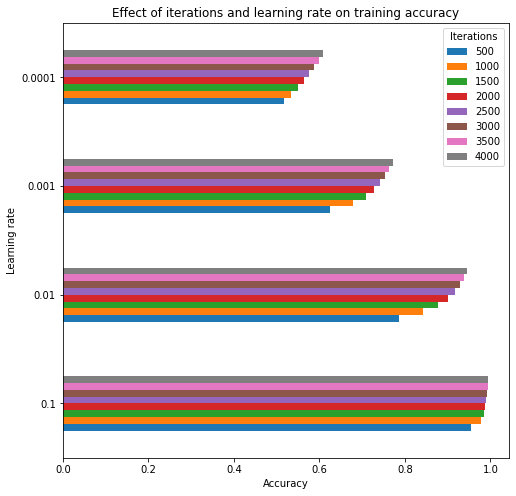

In [17]:
best_param_dataframe.plot(kind = 'barh', figsize = (8, 8), 
    title = 'Effect of iterations and learning rate on training accuracy')

plt.xlabel('Accuracy')
plt.ylabel('Learning rate')
plt.legend(title = 'Iterations')
plt.show()

From the above plot, Learning rate of **0.1** with iterations between **3500 - 4000** gives the best results.